In [84]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Times New Roman'

In [86]:
# !wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [87]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [88]:
data = [(record.title, record.topic, record.text, record.tags)
        for record in records]

In [89]:
data = pd.DataFrame(data, columns=['title', 'topic', 'text', 'tags'])
data.head(2)

,title,topic,text,tags
0,Австрия не представила доказательств вины российских биатлонистов,Спорт,"Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС. «Действует презумпция невиновности. Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве. Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам. Все они продолжат выступление на Кубке мира. Полиция нагрянула в отель сборной России в Хохфильцене вечером 12 декабря. Как написал биатлонист Александр Логинов, их считают виновными в махинациях с переливанием крови. Биатлонисту Антону Шипулину, также попавшему в список, полиция нанесла отдельный визит: сейчас он тренируется отдельно в австрийском Обертиллахе. Обвинения спортсмен назвал бредом, а также указал на «охоту на ведьм» в мировом биатлоне. В Австрии прием допинга — уголовное преступление. Максимальное наказание за его употребление — три года тюрьмы.",Зимние виды
1,Обнаружено самое счастливое место на планете,Путешествия,"Сотрудники социальной сети Instagram проанализировали поставленные пользователями смайлики, геолокации и хештеги и опубликовали итоги 2018 года. Об этом сообщается на официальном сайте Instagram. Таким образом, самой счастливой геолокацией Instagram признал Диснейленд в Токио, так как больше всего счастливых смайликов в 2018 году пользователи ставили именно под фотографиями из японского Диснейленда. Также эксперты назвали самый популярный фильтр для лица: им стал фильтр с сердечками на глазах. А, например, самыми часто используемыми хештегами в 2018 году были #metoo, #timesup и #marchforourlives. В ноябре сотрудники британской ассоциации потребителей Which? составили рейтинг самых безопасных стран для путешествий. Специалисты проанализировали 20 самых популярных туристических направлений по четырем критериям: уровень преступности, угроза здоровью, вероятность теракта и стихийных бедствий. Самой безопасной страной по всем параметрам стала Исландия.",Мир


In [90]:
data.topic.value_counts().head(15)

Россия               160518
Мир                  136680
Экономика            79538 
Спорт                64421 
Культура             53803 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44675 
Из жизни             27611 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Name: topic, dtype: int64

In [91]:
topics = ['Интернет и СМИ', 'Силовые структуры', 'Культура', 'Бизнес',
          'Дом']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

147207

In [92]:
import re
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from spacy.lang.ru.stop_words import STOP_WORDS
import pymorphy2
# from pymystem3 import Mystem

In [93]:
morph = pymorphy2.MorphAnalyzer()

In [94]:
words_regex = re.compile('\w+')


def find_words(text, regex=words_regex):
    tokens = regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words(
    'russian') + list(STOP_WORDS) + ['год', 'также', 'the', 'стать']


def lemmatize(words, lemmer=morph, stopwords=stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords
            and w.isalpha()]


def preprocess(text):
    return (lemmatize(find_words(text)))

In [95]:
data.text.iloc[1]

'Директора завода «Электроприбор» Муталиба Эмиралиева обвинили в уклонении от уплаты налогов и хищении бюджетных средств в общей сложности более чем на 70 миллионов рублей. Об этом сообщают «Известия». В 2014 году Эмиралиев выиграл государственный контракт от Министерства обороны России на ремонт зенитно-ракетного комплекса «Форт» в Мурманске. Подрядчик должен был заменить вышедшие из строя блоки, ячейки, платы и другие высокоточные механизмы вооружения. Общую стоимость комплектующих оценили в 50 миллионов рублей. По версии следствия, Эмиралиев нанял выходцев с Украины, которые за бесценок сделали косметический ремонт оборудования. Он предоставил Минобороны поддельные документы с подтверждением расходов, согласно которым орудия якобы вывозили на ремонт в Пензу и вернули обратно восстановленными и пригодными к использованию. В действительности Эмиралиев не потратил на ремонт почти ничего. В ходе расследования было обнаружено, что обвиняемый использовал похожую схему при выполнении госко

In [96]:
print(preprocess(data.text.iloc[1]))

['директор', 'завод', 'электроприбор', 'муталиб', 'эмиралиев', 'обвинить', 'уклонение', 'уплата', 'налог', 'хищение', 'бюджетный', 'средство', 'общий', 'сложность', 'миллион', 'рубль', 'сообщать', 'известие', 'эмиралиев', 'выиграть', 'государственный', 'контракт', 'министерство', 'оборона', 'россия', 'ремонт', 'зенитный', 'ракетный', 'комплекс', 'форт', 'мурманск', 'подрядчик', 'должный', 'заменить', 'выйти', 'строй', 'блок', 'ячейка', 'плата', 'высокоточный', 'механизм', 'вооружение', 'общий', 'стоимость', 'комплектующие', 'оценить', 'миллион', 'рубль', 'версия', 'следствие', 'эмиралиев', 'нанять', 'выходец', 'украина', 'бесценок', 'сделать', 'косметический', 'ремонт', 'оборудование', 'предоставить', 'минобороны', 'поддельный', 'документ', 'подтверждение', 'расход', 'согласно', 'орудие', 'якобы', 'вывозить', 'ремонт', 'пенза', 'вернуть', 'обратно', 'восстановить', 'пригодный', 'использование', 'действительность', 'эмиралиев', 'потратить', 'ремонт', 'ход', 'расследование', 'обнаружить'

In [97]:
data = data.sample(15000)
data.topic.value_counts()

Культура             5516
Интернет и СМИ       4576
Дом                  2134
Силовые структуры    1985
Бизнес               789 
Name: topic, dtype: int64

In [98]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

In [99]:
data['text'] = preprocessed_text
data.sample(2)

,title,topic,text,tags
21882,В Новой Москве подскочили цены на жилье,Дом,"[стоимость, квартира, крупный, проект, новый, москва, увеличиться, шесть, процент, дать, содержаться, материал, аналитик, циан, поступить, июнь, распоряжение, дом, рынок, жильё, троицкий, новомосковский, автономный, округ, тинао, образ, единственный, субрынок, московский, регион, отмечаться, общий, рост, цена, помимо, удорожание, квартира, счёт, переход, высокий, стадия, строительство, средний, цена, квадратный, метр, первичный, рынок, новый, москва, июнь, составить, тысяча, рубль, данные, циан, ключевой, драйвер, рост, стоимость, жильё, тинао, улучшениетранспортный, доступность, счёт, открытый, анонсировать, станция, метро, кроме, привлекательность, новый, москва, покупатель, недвижимость, вырасти, счёт, развитие, инфраструктура, повышение, качество, новый, проект, способствовать, рост, спрос, жильё, говориться, материал, циан, совершить, тысяча, регистрация, дду, тысяча, ранее, аналитик, компания, метриум, подсчитать, ...]",Квартира
51964,Вышел трейлер ужастика по мотивам «Людей Икс» с актрисой из «Игры престолов»,Культура,"[сеть, появиться, русскоязычный, проморолик, хоррор, новый, мутант, действие, разворачиваться, вселенная, франшиза, человек, икс, клип, опубликовать, youtube, канал, century, fox, russia, пятница, октябрь, фильм, рассказываться, группа, ребёнок, удерживать, взаперти, суперспособность, режиссёр, джош, буна, виноватый, звезда, застрять, любовь, лента, сняться, мэйся, уильямс, арья, старк, сериал, игра, престол, аня, тейлор, джа, сплит, ведьма, чарли, хитон, очень, странный, дело, алисить, брага, легенда, премьера, новый, мутант, наметить, апрель, человек, икс, серия, комикс, создать, стэном, джек, керби, первый, выпуск, датироваться, компания, century, fox, снять, мотив, комикс, девять, фантастический, фильм, сериал, одарённый, первый, эпизод, выйти, начало, октябрь]",Кино


*****************

In [100]:
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora

In [101]:
dictionary = corpora.Dictionary(data['text'])

# игнорируем слова, которые встречаются реже 5 раз или составляют более 0.8 словаря
dictionary.filter_extremes(no_below=5, no_above=0.8)
dictionary.save('lenta.dict')

In [102]:
# Векторизуем документы:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus)

In [103]:
%time lda = LdaModel(corpus, id2word=dictionary, num_topics=5, chunksize=50, update_every=1, passes=2, random_state=11)

Wall time: 21.7 s


In [104]:
lda.show_topics(num_topics=5, num_words=10, formatted=True)

[(0,
  '0.007*"группа" + 0.006*"альбом" + 0.005*"человек" + 0.005*"время" + 0.005*"опубликовать" + 0.005*"первый" + 0.004*"сообщать" + 0.004*"песня" + 0.004*"британский" + 0.004*"новый"'),
 (1,
  '0.021*"процент" + 0.019*"тысяча" + 0.017*"миллион" + 0.015*"компания" + 0.015*"рубль" + 0.013*"доллар" + 0.010*"миллиард" + 0.009*"метр" + 0.008*"строительство" + 0.008*"квадратный"'),
 (2,
  '0.024*"фильм" + 0.013*"картина" + 0.009*"режиссёр" + 0.008*"премия" + 0.008*"актёр" + 0.008*"роль" + 0.007*"работа" + 0.007*"главный" + 0.006*"сообщать" + 0.006*"хороший"'),
 (3,
  '0.013*"компания" + 0.008*"новый" + 0.007*"интернет" + 0.007*"россия" + 0.007*"пользователь" + 0.007*"сайт" + 0.007*"российский" + 0.006*"сеть" + 0.006*"реклама" + 0.006*"самолёт"'),
 (4,
  '0.009*"суд" + 0.009*"россия" + 0.007*"дело" + 0.006*"заявить" + 0.006*"москва" + 0.006*"сообщить" + 0.005*"слово" + 0.005*"решение" + 0.004*"сотрудник" + 0.004*"сообщать"')]

In [105]:
topics

['Интернет и СМИ', 'Силовые структуры', 'Культура', 'Бизнес', 'Дом']

In [106]:
# Вывод: темы можно интерпретировать. Но они не всегда совпадют с исходными (хотя один раз совпали, пока не был установлен random_state).
# 0 тема ближе к музыке, 1 - смесь бизнеса и недвижимости, 2 - тема кино, 3 -Инернет/политика, 4- Политика/Закон

In [107]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

Wall time: 8.96 s


### Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [108]:
print(lda.log_perplexity(corpus))

-8.247961884007385


In [109]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  0.00026179183677934887


In [110]:
coherence_model_lda = CoherenceModel(
    model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.4942368446897489


In [111]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = LdaModel(corpus, id2word=dictionary, num_topics=num,
                   chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(
        model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

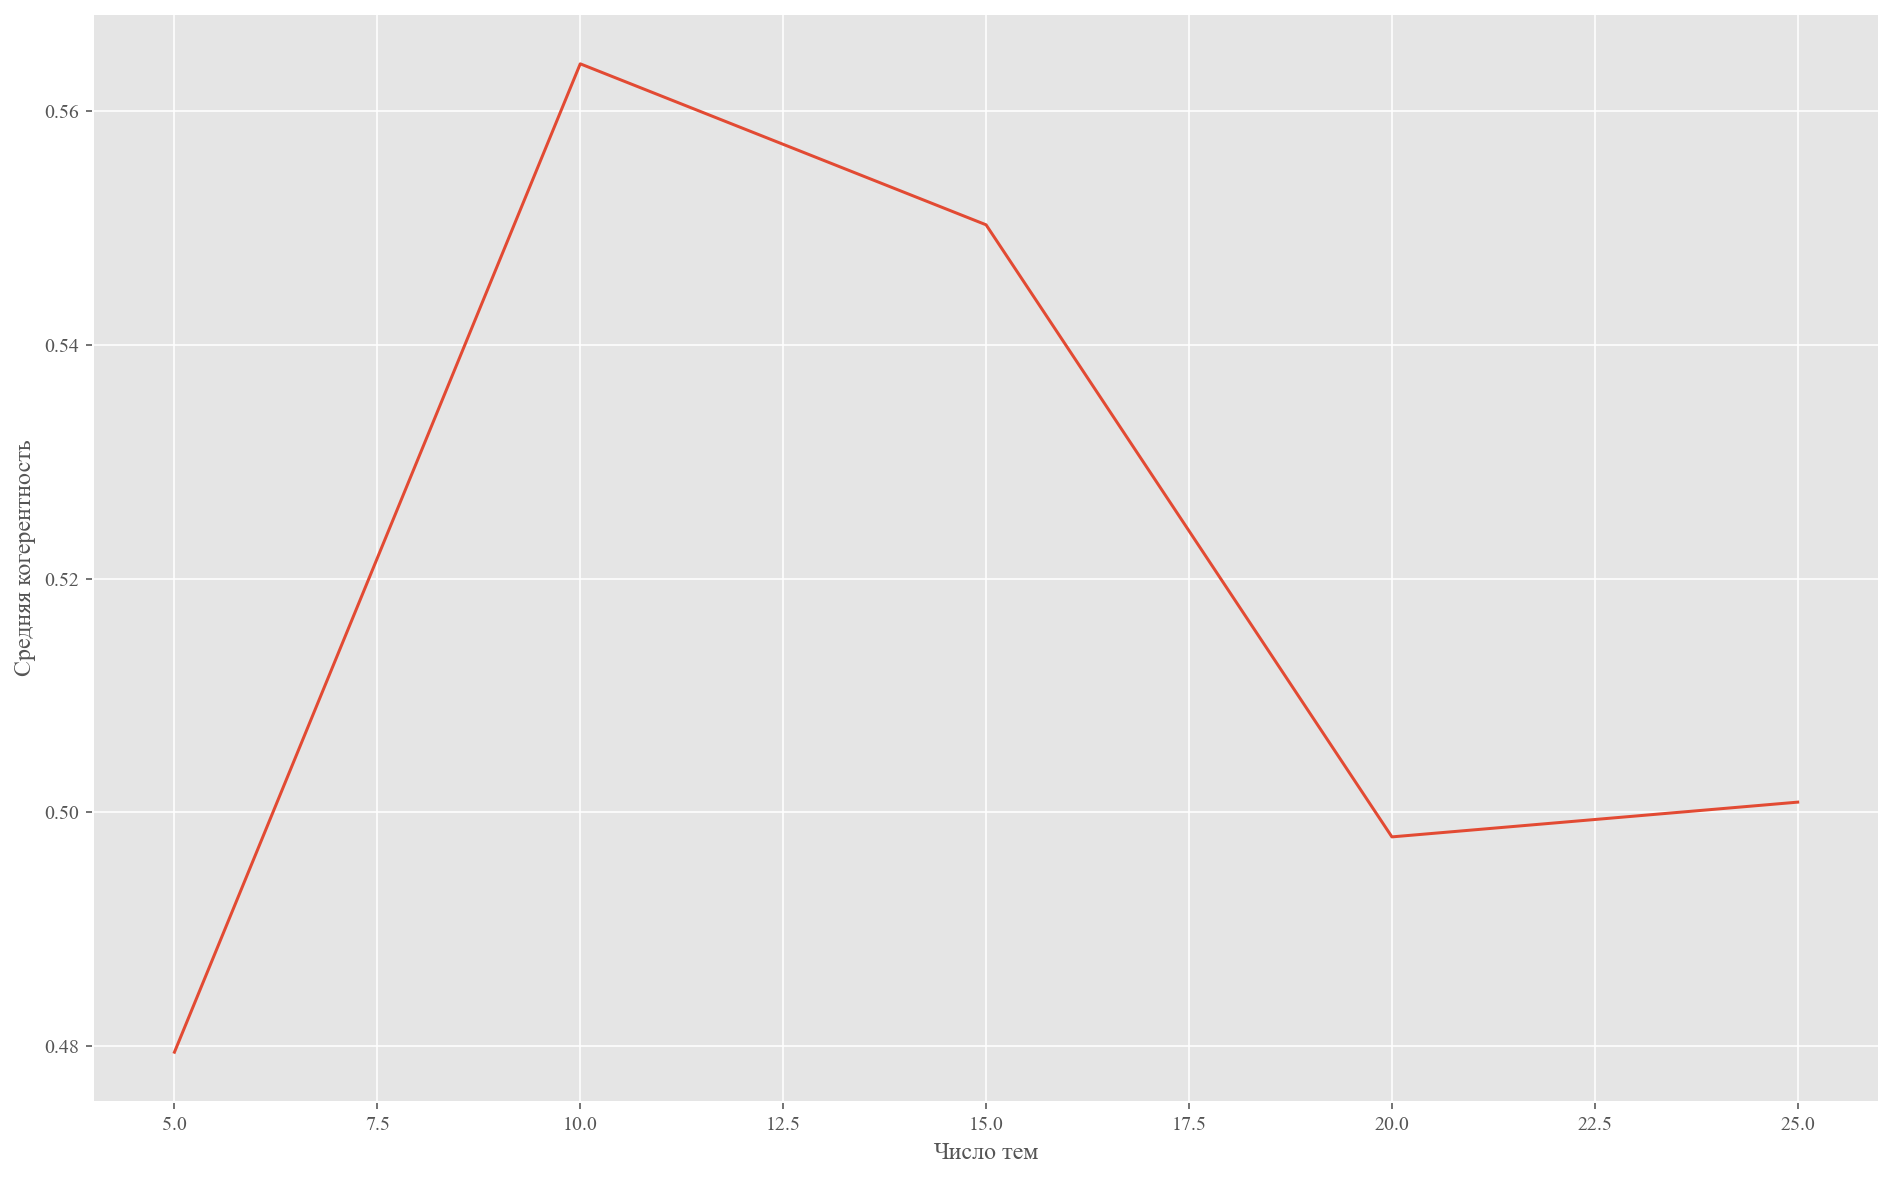

In [112]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(16, 10))
plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [113]:
topics_list = [7, 8, 9, 10, 11, 12, 13]
coherences = []

for num in tqdm(topics_list):
    lda = LdaModel(corpus, id2word=dictionary, num_topics=num,
                   chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(
        model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

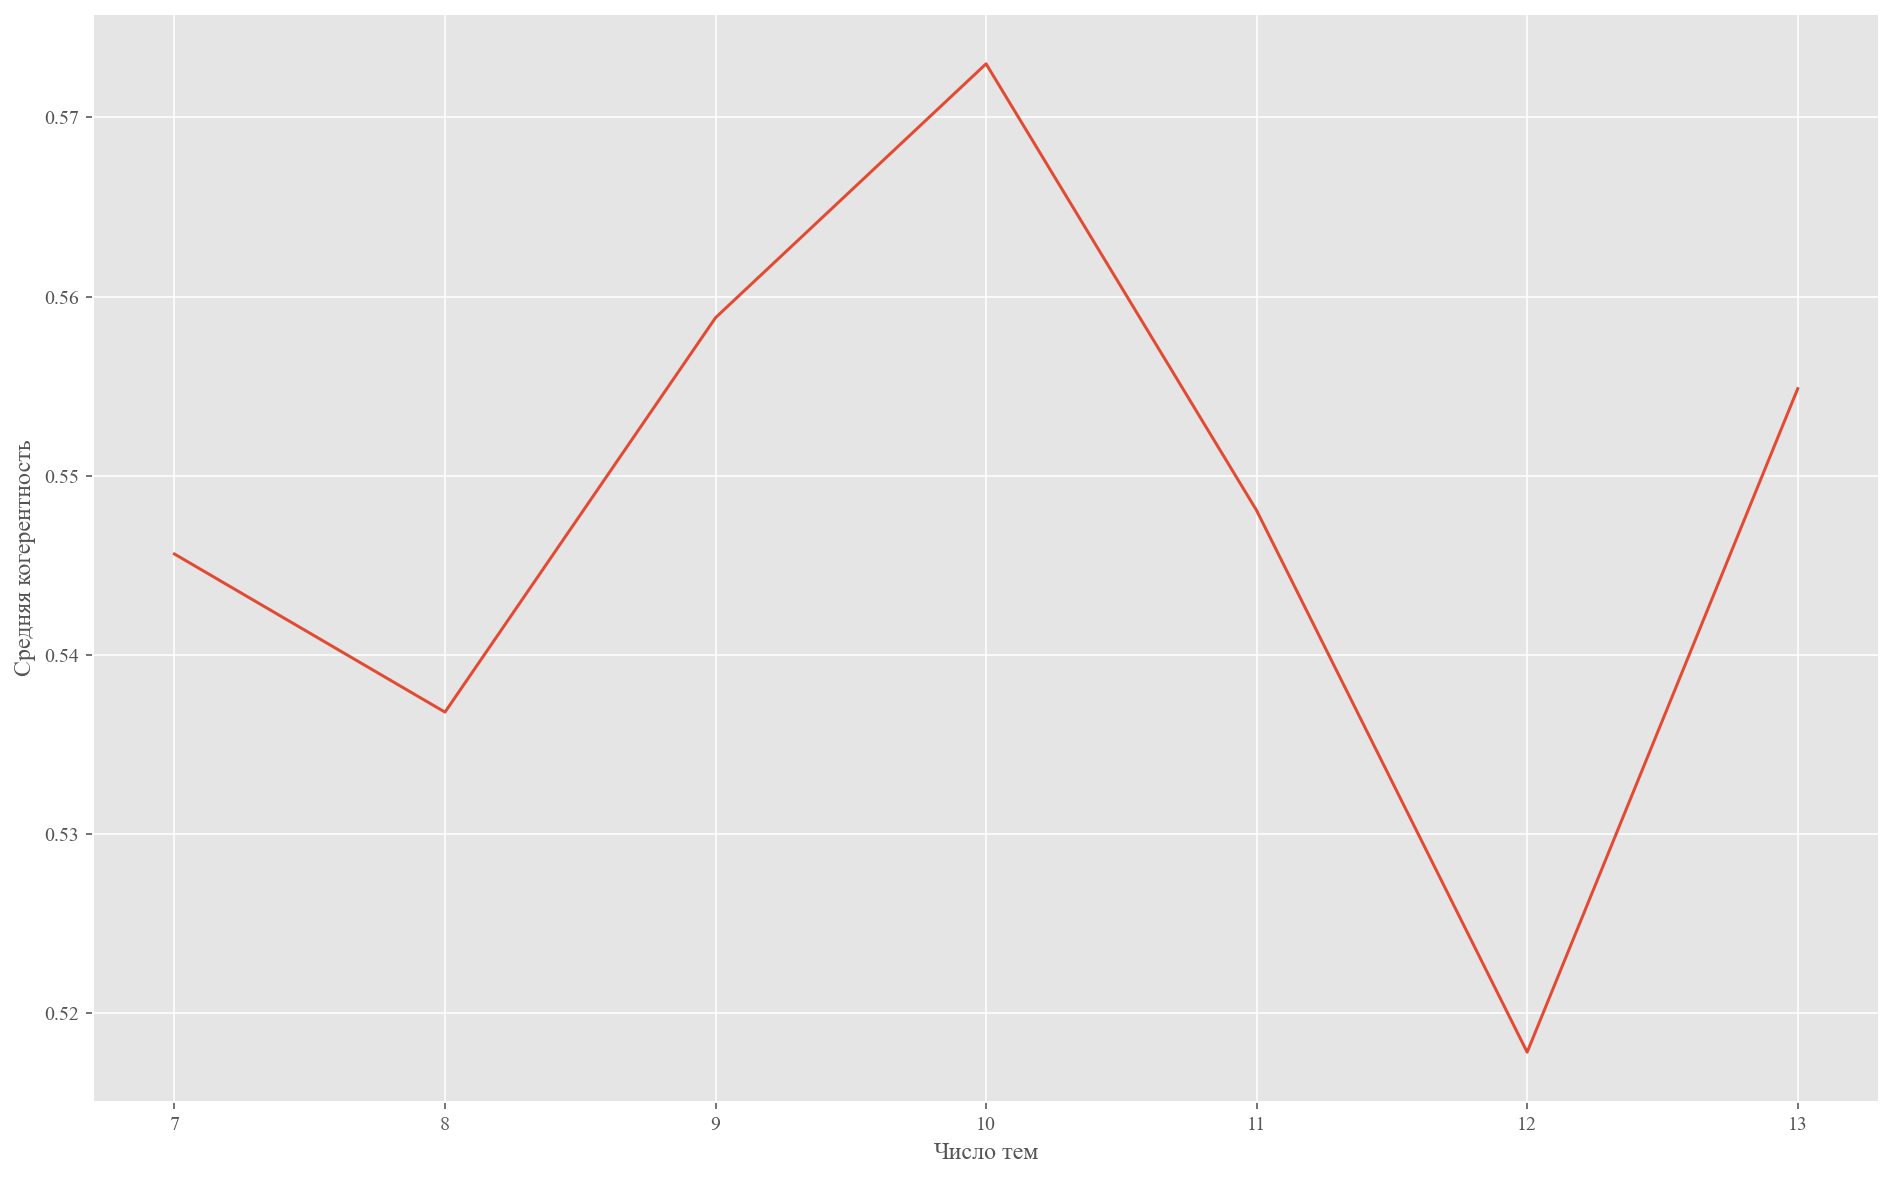

In [114]:
plt.figure(figsize=(16, 10))
plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [115]:
%time lda = LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)

Wall time: 27.1 s


In [116]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.026*"суд" + 0.022*"дело" + 0.012*"сотрудник" + 0.010*"уголовный" + 0.009*"задержать" + 0.009*"статья" + 0.008*"сообщить" + 0.007*"убийство" + 0.007*"полиция" + 0.007*"преступление"'),
 (1,
  '0.033*"фильм" + 0.013*"режиссёр" + 0.011*"актёр" + 0.011*"группа" + 0.011*"роль" + 0.011*"картина" + 0.010*"альбом" + 0.008*"хороший" + 0.008*"первый" + 0.007*"сообщать"'),
 (2,
  '0.021*"компания" + 0.018*"сайт" + 0.017*"пользователь" + 0.015*"интернет" + 0.014*"сеть" + 0.011*"реклама" + 0.009*"сервис" + 0.008*"акция" + 0.007*"информация" + 0.007*"новый"'),
 (3,
  '0.033*"процент" + 0.032*"миллион" + 0.027*"тысяча" + 0.026*"компания" + 0.026*"доллар" + 0.023*"рубль" + 0.016*"миллиард" + 0.012*"рынок" + 0.012*"составить" + 0.011*"квадратный"'),
 (4,
  '0.020*"россия" + 0.012*"российский" + 0.010*"заявить" + 0.009*"решение" + 0.009*"слово" + 0.007*"президент" + 0.007*"страна" + 0.006*"глава" + 0.006*"директор" + 0.006*"новость"'),
 (5,
  '0.022*"москва" + 0.020*"проект" + 0.018*"город" + 

In [117]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

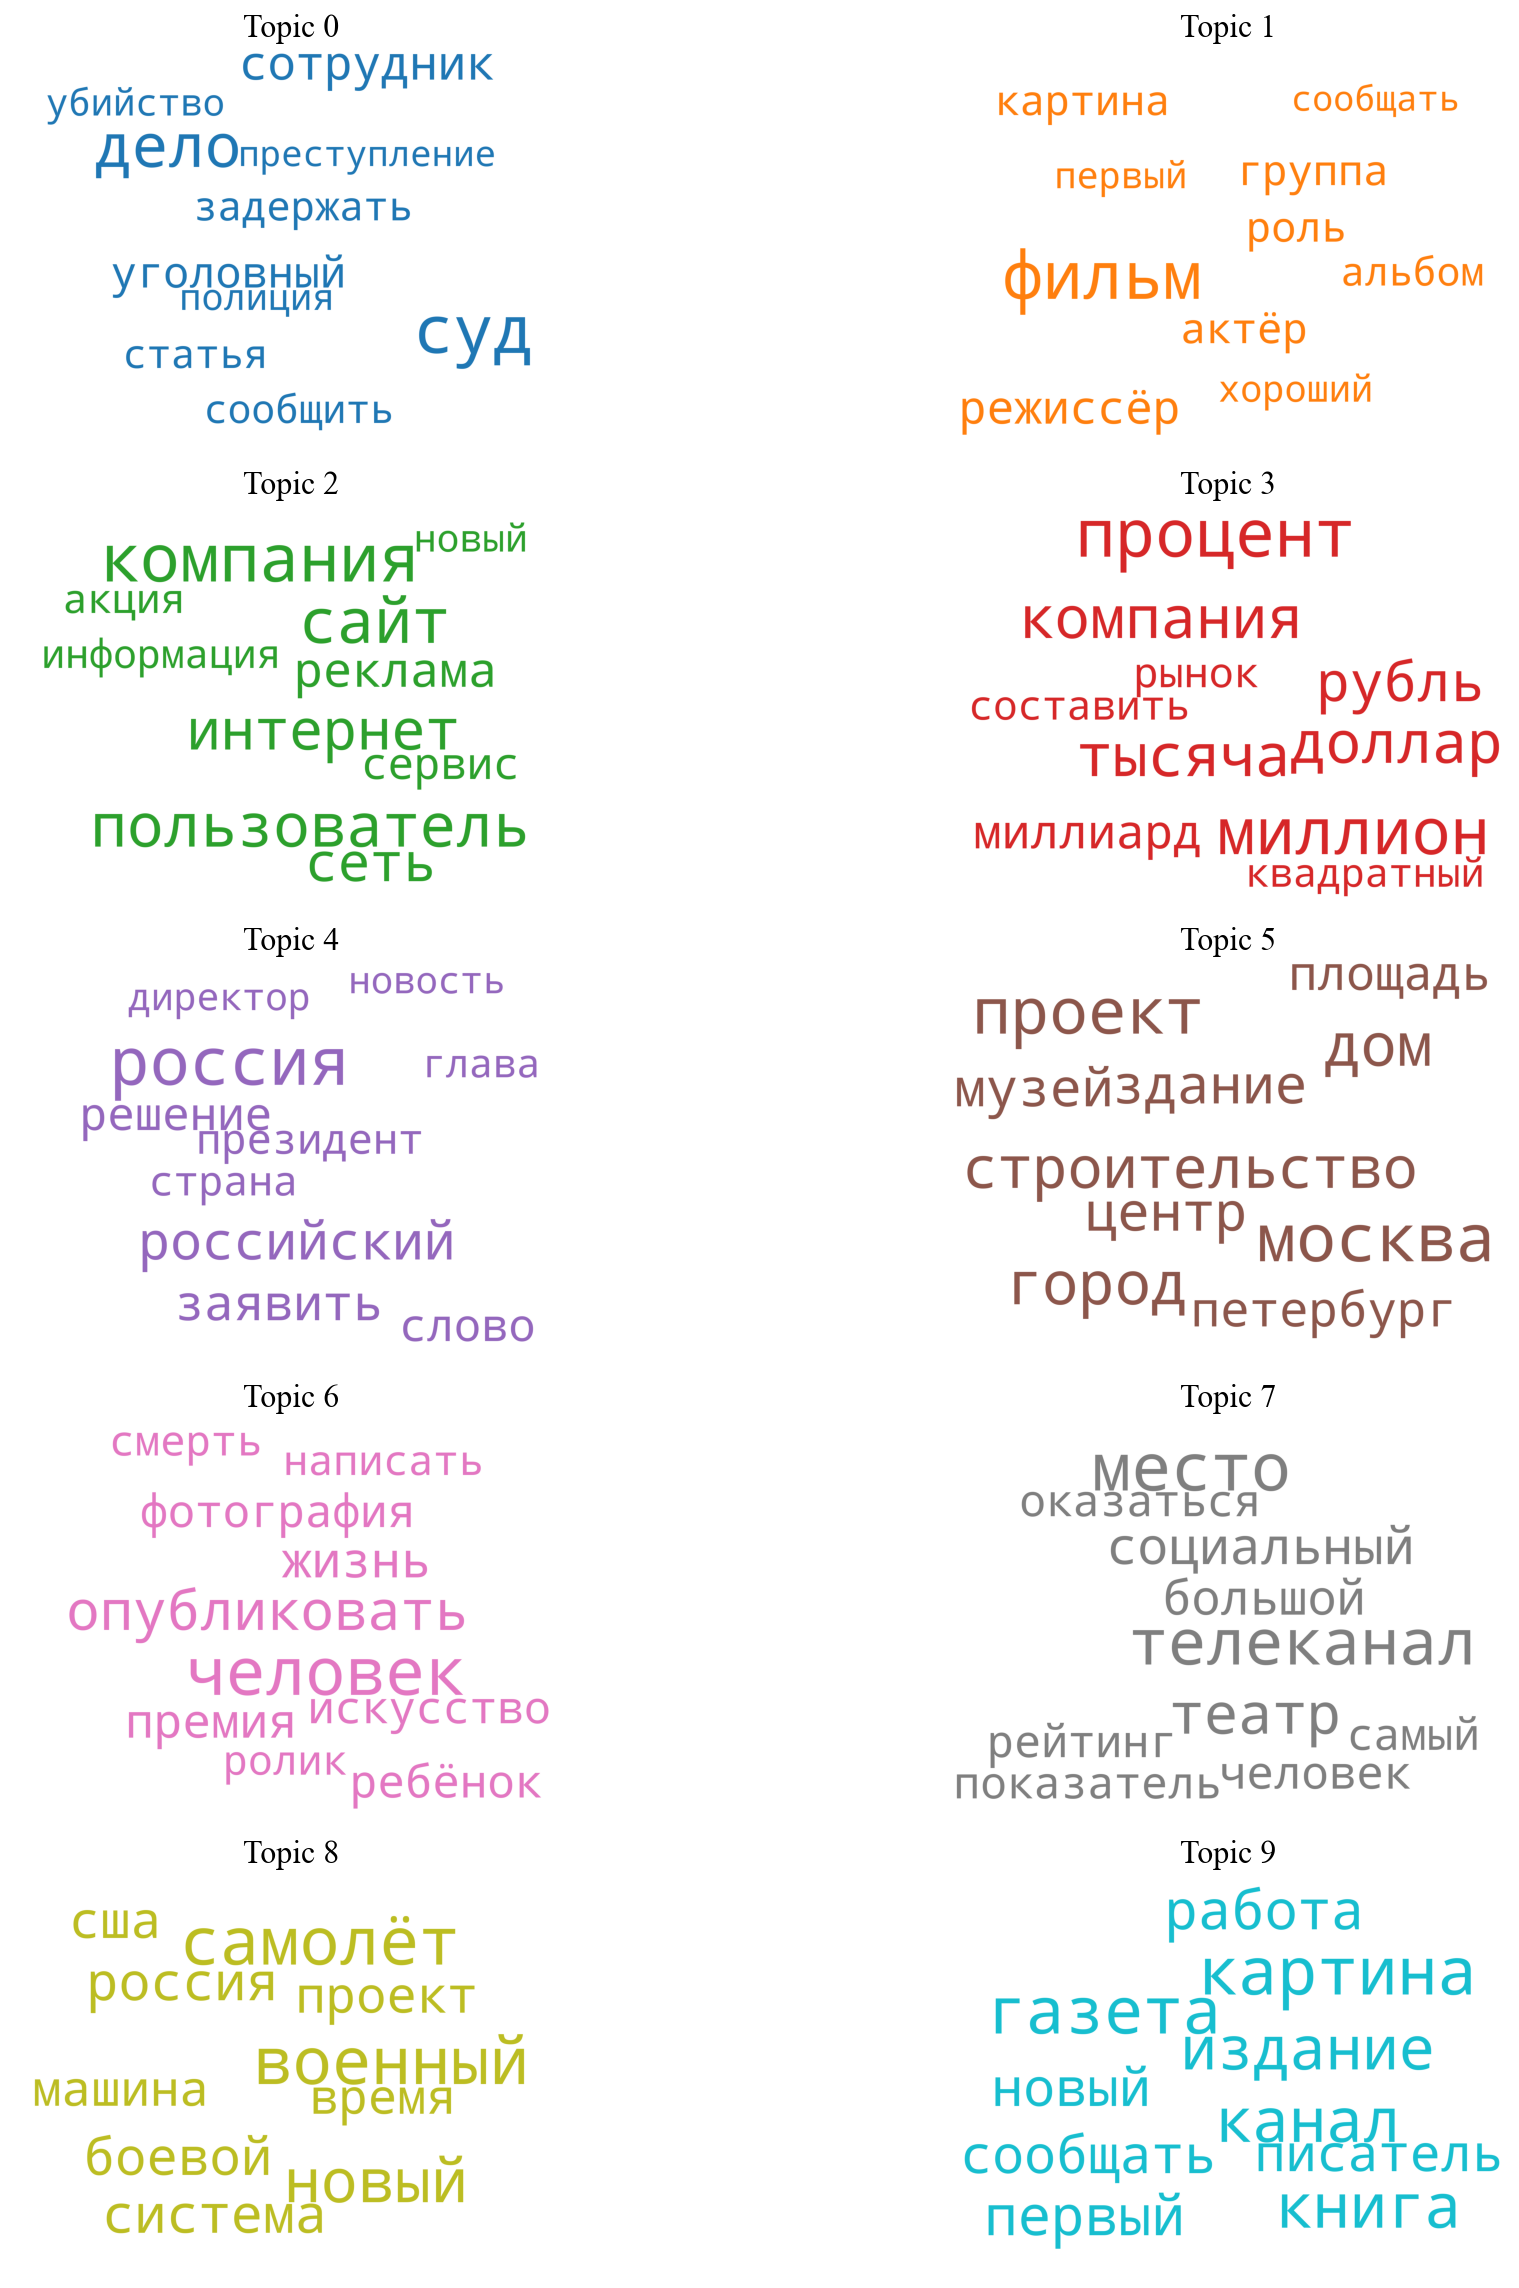

In [118]:
cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  prefer_horizontal=1.0,
                  contour_width=1,
                  contour_color='black',
                  color_func=lambda *args, **kwargs: cols[i])

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(16, 16), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [119]:
['Интернет и СМИ', 'Силовые структуры', 'Культура', 'Бизнес',
          'Дом']

['Интернет и СМИ', 'Силовые структуры', 'Культура', 'Бизнес', 'Дом']

**Вывод:** максимальное значение средней когерентности получилось при числе тем = 10. При этом этом заметно выделение новых тем из 5 исходных ('Интернет и СМИ', 'Силовые структуры', 'Культура', 'Бизнес', 'Дом'). Так из темы культуры заметно отделилась тема кино (topic_1). Из темы 'Силовые структуры' можно выделить 2: военная тематика (topic 8) и  судебная/уголовная (topic 0). Topic_4 - политика. Много тем перемешалось, и их стало сложнее интерпретировать 